In [1]:
import numpy as np
import random
import math
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sns; sns.set()

# Curve Fitting for L. Plantarum GFP/mCherry 
1. Define sigmoid function in two forms 
2. Fit data to sigmoid function to find r and k values 
3. Find dilution rate/or threshold time to keep OD basically constant

In [53]:
#Defining logistic function
def sigmoid(x, L, x0, k):
     y = L / (1 + np.exp(-k*(x-x0)))
     return y
#Defining logistic function, but in log form
def log_sigmoid(x,L,x0,k):
    y=math.log(L)-math.log(np.exp(-k*(math.log(x)-x0)))
    return y

In [54]:
data1=pd.read_excel("4_7_lp_gc1.xlsx")
data2=pd.read_excel("4_7_lp_gc2.xlsx")
data2
order=['Time','Temp','GFP 1x','GFP 1x','GFP 1x','GFP 1x','GFP 1x','GFP 1x','GFP 1x','GFP 1x','GFP 1x','Media 1x','Media 1x','Media 1x',
      'MC1 1x','MC1 1x','MC1 1x','MC2 1x','MC2 1x','MC2 1x','MC3 1x','MC3 1x','MC3 1x','Media 1x','Media 1x','Media 1x',
      'GFP 6x','GFP 6x','GFP 6x','GFP 6x','GFP 6x','GFP 6x','GFP 6x','GFP 6x','GFP 6x','Media 6x','Media 6x','Media 6x',
      'MC1 6x','MC1 6x','MC1 6x','MC2 6x','MC2 6x','MC2 6x','MC3 6x','MC3 6x','MC3 6x','Media 6x','Media 6x','Media 6x',
      'GFP 36x','GFP 36x','GFP 36x','GFP 36x','GFP 36x','GFP 36x','GFP 36x','GFP 36x','GFP 36x','Media 36x','Media 36x','Media 36x',
      'MC1 36x','MC1 36x','MC1 36x','MC2 36x','MC2 36x','MC2 36x','MC3 36x','MC3 36x','MC3 36x','Media 36x','Media 36x','Media 36x',
      'GFP 180x','GFP 180x','GFP 180x','GFP 180x','GFP 180x','GFP 180x','GFP 180x','GFP 180x','GFP 180x','Media 180x','Media 180x','Media 180x',
      'MC1 180x','MC1 180x','MC1 180x','MC2 180x','MC2 180x','MC2 180x','MC3 180x','MC3 180x','MC3 180x','Media 180x','Media 180x','Media 180x']
data1.columns=order
data2.columns=order
data2


       

,Time,Temp,GFP 1x,GFP 1x,GFP 1x,GFP 1x,GFP 1x,GFP 1x,GFP 1x,GFP 1x,...,MC1 180x,MC2 180x,MC2 180x,MC2 180x,MC3 180x,MC3 180x,MC3 180x,Media 180x,Media 180x,Media 180x
0,00:04:16,25.1,0.183,0.193,0.184,0.184,0.186,0.179,0.186,0.181,...,0.095,0.097,0.096,0.100,0.099,0.102,0.103,0.102,0.097,0.093
1,00:09:16,25.1,0.187,0.197,0.189,0.187,0.189,0.184,0.190,0.186,...,0.095,0.097,0.096,0.100,0.099,0.101,0.103,0.102,0.097,0.093
2,00:14:16,25.2,0.191,0.200,0.192,0.189,0.193,0.187,0.194,0.190,...,0.095,0.097,0.096,0.100,0.099,0.101,0.103,0.102,0.098,0.093
3,00:19:16,25.2,0.195,0.202,0.196,0.191,0.196,0.191,0.198,0.193,...,0.095,0.097,0.096,0.100,0.099,0.101,0.103,0.102,0.097,0.093
4,00:24:16,25.2,0.199,0.206,0.200,0.194,0.200,0.197,0.203,0.199,...,0.095,0.097,0.096,0.100,0.098,0.101,0.103,0.102,0.097,0.093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,21:19:16,25.7,1.755,1.763,1.799,1.758,1.793,1.803,1.819,1.806,...,0.096,0.101,0.098,0.104,0.100,0.101,0.103,0.097,0.095,0.091
256,21:24:16,25.7,1.756,1.764,1.799,1.756,1.791,1.801,1.818,1.805,...,0.096,0.101,0.098,0.104,0.100,0.101,0.103,0.097,0.095,0.091
257,21:29:16,25.6,1.756,1.764,1.799,1.758,1.792,1.802,1.819,1.806,...,0.096,0.101,0.098,0.104,0.100,0.101,0.103,0.097,0.095,0.091
258,21:34:16,25.6,1.756,1.765,1.798,1.756,1.792,1.802,1.819,1.806,...,0.096,0.101,0.098,0.104,0.100,0.101,0.103,0.097,0.095,0.091


In [56]:
samples=['GFP','MC1','MC2','MC3']
dilutions=['1x','6x','36x','180x']
for sample in samples:
    for dilution in dilutions:
        data1['NormAve '+sample+' '+dilution]=(data1[sample+' '+dilution].mean(axis=1)-data1['Media '+dilution].mean(axis=1)+data2[sample+' '+dilution].mean(axis=1)-data2['Media '+dilution].mean(axis=1))/2
data1['Time']=[5*x for x in range(0,260)]
data1['Time']

0         0
1         5
2        10
3        15
4        20
       ... 
255    1275
256    1280
257    1285
258    1290
259    1295
Name: Time, Length: 260, dtype: int64

[Text(0.5,1,'Growth Rate of L Plantarum on diluted media')]

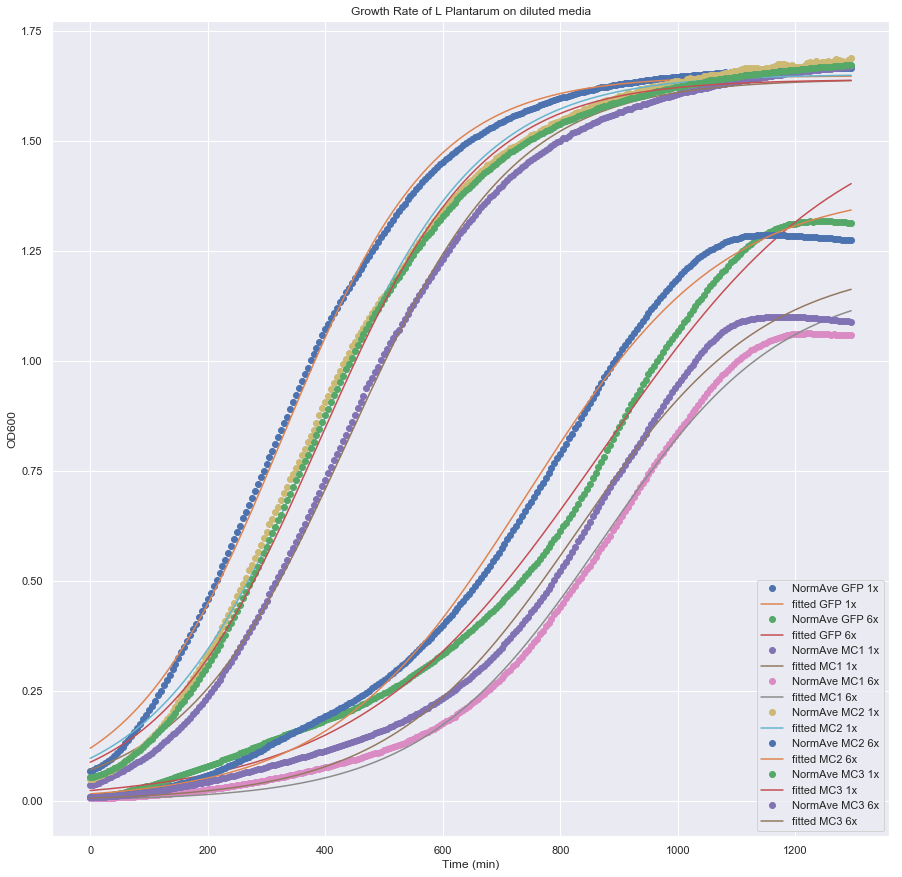

In [58]:
r_vals={}
k_vals={}
threshold_time={}
fig, ax = plt.subplots(1,1,figsize=(15,15), sharex=True, sharey=True) 
for sample in samples:
    for dilution in dilutions[:-2]:
        x_vals=data1['Time'].values
        y_vals=data1['NormAve '+sample+' '+dilution].values 
        ax.plot(data1['Time'],data1['NormAve '+sample+' '+dilution], 'o',label='NormAve '+sample+' '+dilution)
        #gets fit
        try:
            popt, pcov = curve_fit(sigmoid,x_vals,y_vals, p0=[0.5,1000,0.01])
        except RuntimeError:
            pass
        
        r_vals[sample+' '+dilution]=popt[2]
        k_vals[sample+' '+dilution]=popt[0]
        try:
            threshold_time[sample+' '+dilution]=5*data1[data1['NormAve '+sample+' '+dilution].gt(0.05)].index[0]
        except IndexError:
            threshold_time[sample+' '+dilution]=5
        fitted_y=sigmoid(x_vals,*popt)
        ax.plot(x_vals,fitted_y,label="fitted "+sample+' '+dilution)
ax.legend(loc='lower right')
ax.set_xlabel("Time (min)")
ax.set_ylabel("OD600")
ax.set(title='Growth Rate of L Plantarum on diluted media')

In [59]:
print(r_vals)
print(k_vals)
print(threshold_time)
doubling_time={}
for r_val in r_vals:
    doubling_time[r_val]=np.log(2)/(r_vals[r_val])
print(doubling_time)

{'GFP 1x': 0.00779353750719697, 'GFP 6x': 0.004810642198634082, 'MC1 1x': 0.00706490026388376, 'MC1 6x': 0.0065119940505820005, 'MC2 1x': 0.007212043706528928, 'MC2 6x': 0.005974088068778291, 'MC3 1x': 0.0073413547620745385, 'MC3 6x': 0.006265364715253912}
{'GFP 1x': 1.6471641660231802, 'GFP 6x': 1.5833853282855954, 'MC1 1x': 1.640209430342001, 'MC1 6x': 1.1841058189279154, 'MC2 1x': 1.650795810300808, 'MC2 6x': 1.392131963958011, 'MC3 1x': 1.6391603263451, 'MC3 6x': 1.2249593117595996}
{'GFP 1x': 0, 'GFP 6x': 140, 'MC1 1x': 30, 'MC1 6x': 315, 'MC2 1x': 5, 'MC2 6x': 180, 'MC3 1x': 0, 'MC3 6x': 225}
{'GFP 1x': 88.93871106924885, 'GFP 6x': 144.08620552922338, 'MC1 1x': 98.1113893572369, 'MC1 6x': 106.44161760221452, 'MC2 1x': 96.10967553239482, 'MC2 6x': 116.02560467470558, 'MC3 1x': 94.41679404198607, 'MC3 6x': 110.63157726035979}
